In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import norm
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
print("Library")

Library


In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [3]:
import os
#os.getcwd()
os.chdir('C:/Users/asus1/Desktop/bootcamp')
#reading data
veri=pd.read_csv('hmelq.csv')
veri.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [4]:
dms=pd.get_dummies(veri[['reason', 'job']])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [5]:
n_veri = veri.drop(["reason","job"],axis=1)
n_veri.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [14]:
veri = pd.concat([n_veri, dms[["reason_DebtCon","reason_HomeImp","job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]],axis = 1)
veri=veri.dropna()
veri.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,0,81200,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042,0,1,0,0,0,0,0,0
1,0,12600,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479,1,0,0,0,0,0,0,0
2,0,18000,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354,1,0,0,0,0,0,0,0
3,0,10300,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992,1,0,0,0,0,0,0,0
4,0,9400,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327,1,0,0,0,0,0,0,0


In [15]:
y=veri["bad"]
X=veri.drop(["bad"],axis=1)
X=pd.DataFrame(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1473, 18)
(632, 18)
(1473,)
(632,)


Decision Tree Yapalım

In [16]:
from sklearn.tree import DecisionTreeClassifier
cart=DecisionTreeClassifier()
cart_model=cart.fit(X_train,y_train)
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9240506329113924

Accuracy'miz çok yüksek çıkmış. Recalllara da bakalım

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       574
           1       0.60      0.52      0.56        58

    accuracy                           0.92       632
   macro avg       0.78      0.74      0.76       632
weighted avg       0.92      0.92      0.92       632



In [21]:
?cart_model

In [22]:
cart_grid = {"max_depth": range(1,10),
             "min_samples_split" : list(range(2,50))}

In [23]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs=-1, verbose=1)
cart_cv_model=cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   25.1s finished


In [24]:
#En iyi parametreleri alalım
print("En iyi paramatreler: " + str(cart_cv_model.best_params_)) #en iyilerini bul

En iyi paramatreler: {'max_depth': 9, 'min_samples_split': 7}


In [25]:
cart = tree.DecisionTreeClassifier(max_depth=9, min_samples_split=7)
cart_tuned=cart.fit(X_train, y_train)

In [26]:
y_pred=cart_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9382911392405063

Bakıldığında ilk duruma göre accuracy'nin artiği görülmektedir. İlk default durumunda accuracymiz = 0.924 iken, şimdi 0.938'dir. Raporlayalım

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       574
           1       0.88      0.38      0.53        58

    accuracy                           0.94       632
   macro avg       0.91      0.69      0.75       632
weighted avg       0.94      0.94      0.93       632



Precision: 1 için iyileşmiş
Recall   : 0 için iyileşmiş, 1 için düşmüştür
f1-score : 0 için iyileşmiş, 1 için düşmüştür
Accuracy : iyileşmiştir    

RANDOM FOREST YAPALIM 

In [40]:
#Random forest
y=veri["bad"]
X=veri.drop(["bad"],axis=1)
X=pd.DataFrame(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)



In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier().fit(X_train,y_train)
rf_model

C:\Users\asus1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
y_pred=rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9462025316455697

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       574
           1       0.96      0.43      0.60        58

    accuracy                           0.95       632
   macro avg       0.95      0.71      0.78       632
weighted avg       0.95      0.95      0.94       632



Model tuning

In [33]:
?rf_model

In [34]:
rf_params= {"max_depth": [2,5,8],
           "max_features": [2,5,8],
           "n_estimators": [10,50,500],
           "min_samples_split": [2,5,8]}

In [35]:
rf_model = RandomForestClassifier()
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2)
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  2.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [36]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 8, 'n_estimators': 500}


In [37]:
rf_tuned = RandomForestClassifier(max_depth = 8,
                                 max_features =8,
                                 min_samples_split=8,
                                 n_estimators=500)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
y_pred=rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.939873417721519

Accuracymiz 0.9367'den 0.9398'e yükselmiştir

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       574
           1       0.92      0.38      0.54        58

    accuracy                           0.94       632
   macro avg       0.93      0.69      0.75       632
weighted avg       0.94      0.94      0.93       632



Precisionlar ve f1 score düşmüştür

In [45]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100}, index=X_train.columns)

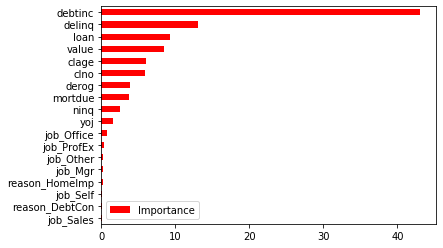

In [46]:
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color ='r')
plt.show()

Importance grafiğine ve tablosuna bakılıdğında debtinc ve delinq parametrelerinin anlamlı olduğu çıkmıştır.Importance değerinin 
10'dan büyük olduğu tek parametreler:debtinc ve delinqdir

In [48]:
Importance

,Importance
loan,9.331706
mortdue,3.697003
value,8.475816
yoj,1.599782
derog,3.884678
delinq,13.092410
clage,6.048364
ninq,2.497627
clno,5.973161
debtinc,43.055753


XGBOOST YAPALIM

In [49]:
###Xgboost
y=veri["bad"]
X=veri.drop(["bad"],axis=1)
X=pd.DataFrame(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [50]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier().fit(X_train,y_train)
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [51]:
y_pred=xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9462025316455697

In [52]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       574
           1       0.96      0.43      0.60        58

    accuracy                           0.95       632
   macro avg       0.95      0.71      0.78       632
weighted avg       0.95      0.95      0.94       632



In [54]:
?xgb_model

In [55]:
xgb_params = {"n_estimators":[100,500],
              'subsample':[0.6,0.8,1.0],
             "max_depth": [3,4,5],
             "learning_rate":[0.1,0.01,0.2,0.05],
             "min_samples_split":[2,5,10]}
xgb=XGBClassifier()
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs = -1, verbose=2)

In [56]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 14.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.2, 0.05],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 

In [57]:
print("En iyi parametreler : " + str(xgb_cv_model.best_params_))

En iyi parametreler : {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.6}


In [58]:
xgb=XGBClassifier(learning_rate=0.2, max_depth=3, min_samples_split=2, n_estimators=500,subsample=0.6)
xgb_tuned=xgb.fit(X_train,y_train)

In [63]:
y_pred=xgb_tuned.predict(X_test)

accuracy_score(y_test,y_pred)

0.9414556962025317

Accuracymiz düşmüş,xgb_params da çeşitli parametreler(n_estimators gibi )değiştirilerek model yeniden fit edilebilir.

In [64]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       574
           1       0.89      0.41      0.56        58

    accuracy                           0.94       632
   macro avg       0.92      0.70      0.77       632
weighted avg       0.94      0.94      0.93       632



Precision, recall, f1 score ve accuracy düşmüş

YAPAY SİNİR AĞLARI 

In [83]:
#neural network
y=veri["bad"]
X=veri.drop(["bad"],axis=1)
X=pd.DataFrame(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [84]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier().fit(X_train_scaled, y_train)
mlpc

C:\Users\asus1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [86]:
y_pred= mlpc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9588607594936709

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       574
           1       1.00      0.55      0.71        58

    accuracy                           0.96       632
   macro avg       0.98      0.78      0.84       632
weighted avg       0.96      0.96      0.95       632



Model tuning

In [75]:
?mlpc

In [76]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [77]:
mlpc= MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=10,n_jobs=-1, verbose=2)
mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  9.7min finished
C:\Users\asus1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         '

In [78]:
print("En iyi parametreler : " + str(mlpc_cv_model.best_params_))

En iyi parametreler : {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [79]:
mlpc_tuned = MLPClassifier(activation = "relu", alpha=0.1, hidden_layer_sizes=(100,100), solver = "adam")

In [88]:
mlpc_tuned.fit(X_train_scaled, y_train)
y_pred=mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

C:\Users\asus1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9572784810126582

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       574
           1       1.00      0.53      0.70        58

    accuracy                           0.96       632
   macro avg       0.98      0.77      0.84       632
weighted avg       0.96      0.96      0.95       632

